In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Load the Breast Cancer Dataset


In [3]:
data = load_breast_cancer()
X = data.data
y = data.target  # Target labels (0: malignant, 1: benign)

Standardize the Data
- PCA is sensitive to the scale of the data, so it's important to standardize the features before applying PCA.

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Apply PCA to reduce the dimensionality of the dataset.

In [5]:
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

Analyze Explained Variance
- Allows us to check how much information is retained by the principal components

In [6]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", np.sum(explained_variance))

Explained variance by each component: [0.44272026 0.18971182]
Total explained variance: 0.6324320765155945


Visualize the PCA Results

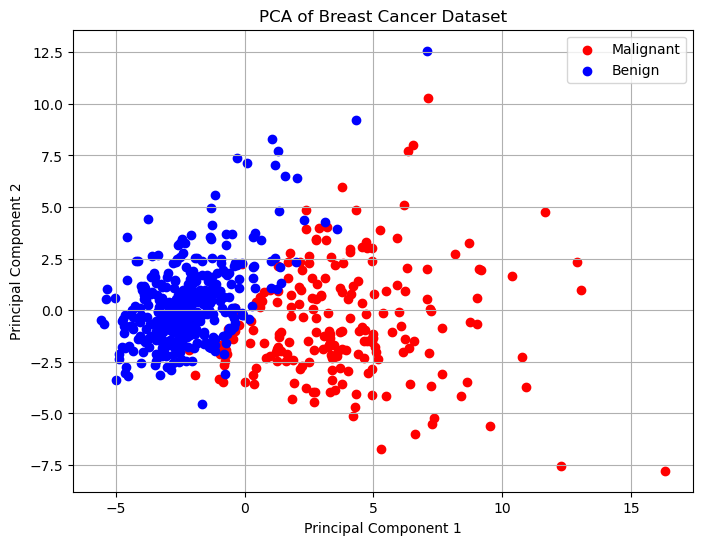

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Malignant')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Benign')
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

Check for Multicollinearity
- Compute the correlation matrix of the original features and visualize it

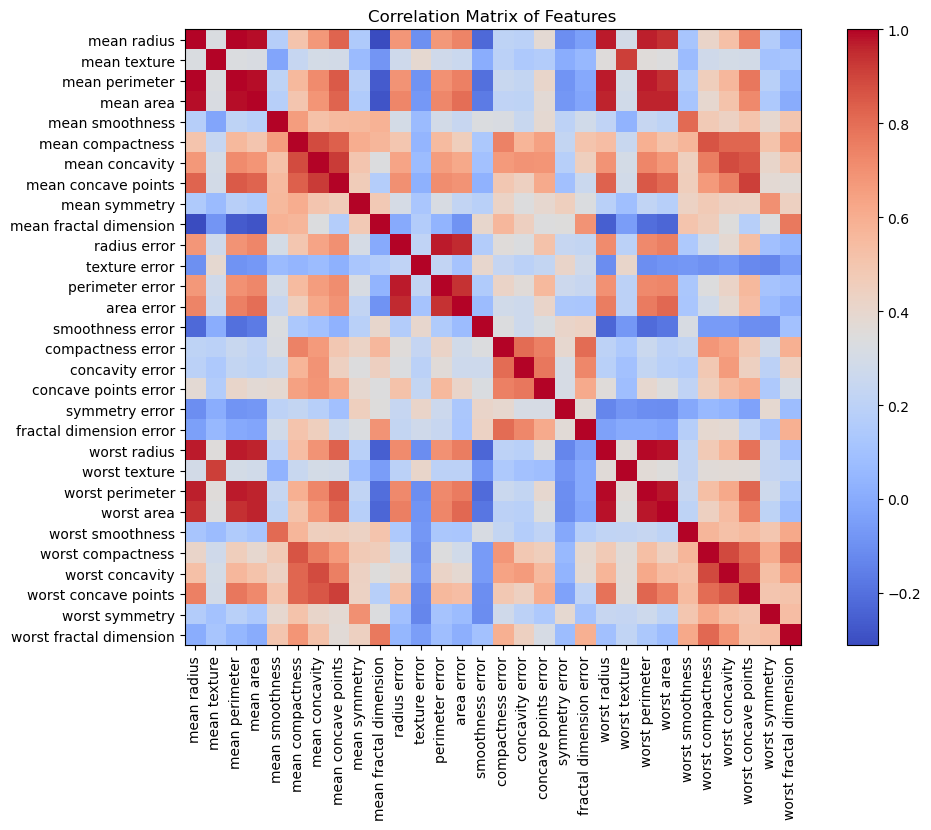

In [9]:
features_df = pd.DataFrame(X, columns=data.feature_names)

# Compute and plot the correlation matrix
correlation_matrix = features_df.corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Features')
plt.xticks(range(len(features_df.columns)), features_df.columns, rotation=90)
plt.yticks(range(len(features_df.columns)), features_df.columns)
plt.show()
